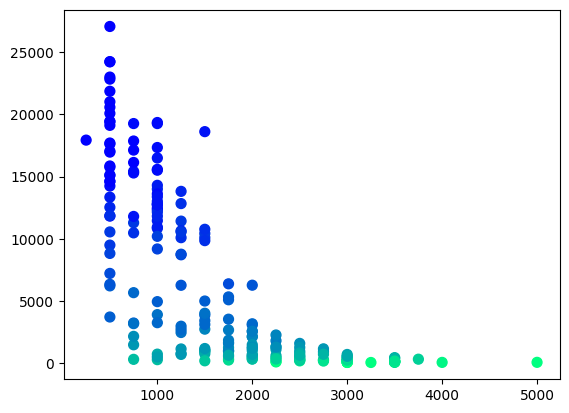

In [ ]:
import requests as r
import json
import matplotlib.pyplot as plt
import numpy as np
# import matplotlib as plt
url = "https://codeforces.com/api/problemset.problems"
data = r.get(url).text
json_data = json.loads(data)

problem = json_data["result"]["problems"]
problemStats = json_data["result"]["problemStatistics"]
x1 = list()
x2 = list()
y = list()

itr = 0
while(len(x1)!=200):
    t1 = problem[itr]
    t2 = problemStats[itr]
    if ("points" in t1) and ("rating" in t1) and ("solvedCount" in t2):
        x1.append(problem[itr]["points"])
        y.append(problem[itr]["rating"])
        x2.append(problemStats[itr]["solvedCount"])
    itr += 1

plt.scatter(x1, x2, c=y, s=50, cmap='winter')


In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=10)
X = list()
for i in range(len(x1)):
  X.append([x1[i],x2[i]])
model.fit(X, y)

SVC(C=10, kernel='linear')

In [ ]:
# testData = [[750],[10000]]
# p = model.predict([[1050,7000]])
# print(p)

In [ ]:
testData = list()
y_pred = list()
while(len(testData)!=100):
    t1 = problem[itr]
    t2 = problemStats[itr]
    if ("points" in t1) and ("rating" in t1) and ("solvedCount" in t2):
      testData.append([int(t1['points']),int(t2['solvedCount'])])
      y_pred.append(t1['rating'])
    itr += 1

def resolve(rating):
    difficulty = list()
    for i in range(len(rating)):
      if (rating[i] <= 1200):
          difficulty.append("Easy")
      elif (rating[i] >= 1200 and rating[i] <= 1700):
          difficulty.append("Medium")
      elif (rating[i] >= 1700 and rating[i] <= 2200):
          difficulty.append("Hard")
      else:
          difficulty.append("Very Hard")
    return difficulty

prediction = model.predict(testData)
prediction = resolve(prediction)
y_pred = resolve(y_pred)

In [ ]:
count = 0
for i in range(len(testData)):
  if y_pred[i] == prediction[i]:
    count+=1
print(count)

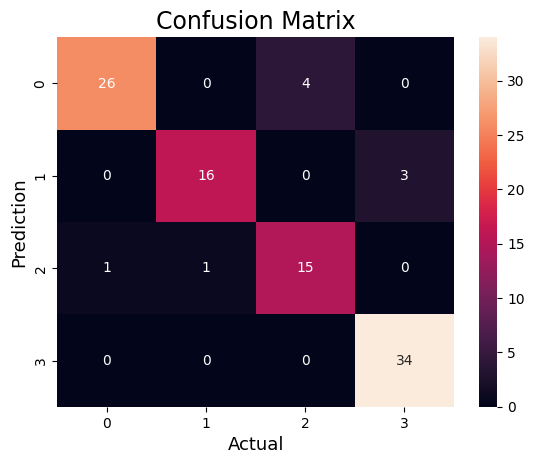

Accuracy   : 0.91


In [ ]:
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# compute the confusion matrix
cm = confusion_matrix(y_pred,prediction)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# Finding precision and recall
accuracy = accuracy_score(y_pred, prediction)
print("Accuracy   :", accuracy)